In [1]:
'''
    Music-Hits
    An analysis of Billboard 100 Charts
    Project By Williambd
    
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()

In [2]:
df = pd.read_csv("C:\\Users\\LiamDeaton\\Documents\\DATAProj\\Billboard-Data\\Hits-Analysis\\kcmillersean-billboard-hot-100-1958-2017\\kcmillersean-billboard-hot-100-1958-2017\\Hot Stuff.csv")
#features = pd.read_excel("C:\\Users\\LiamDeaton\\Documents\\DATAProj\\Billboard-Data\\Hits-Analysis\\kcmillersean-billboard-hot-100-1958-2017\\kcmillersean-billboard-hot-100-1958-2017\\Hot 100 Audio Features.xlsx")

In [3]:
df.sample(5)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
290816,http://www.billboard.com/charts/hot-100/1981-0...,4/4/1981,96,Ch Ch Cherie,The Johnny Average Band Featuring Nikki Wills,Ch Ch CherieThe Johnny Average Band Featuring ...,1,53.0,53,7
183918,http://www.billboard.com/charts/hot-100/1998-0...,9/12/1998,76,Here We Go,Funkmaster Flex Presents Khadejia Featuring Pr...,Here We GoFunkmaster Flex Presents Khadejia Fe...,1,72.0,72,4
118950,http://www.billboard.com/charts/hot-100/1982-1...,11/27/1982,49,"Let's Go Dancin' (ooh La, La, La)",Kool & The Gang,"Let's Go Dancin' (ooh La, La, La)Kool & The Gang",1,53.0,49,5
59533,http://www.billboard.com/charts/hot-100/1971-0...,3/20/1971,18,Temptation Eyes,The Grass Roots,Temptation EyesThe Grass Roots,1,20.0,18,13
22600,http://www.billboard.com/charts/hot-100/2000-0...,2/19/2000,6,All The Small Things,Blink-182,All The Small ThingsBlink-182,1,7.0,6,12


In [4]:
#df[df["SongID"]=="DreamsFleetwood Mac"]

In [5]:
#df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320495 entries, 0 to 320494
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     320495 non-null  object 
 1   WeekID                  320495 non-null  object 
 2   Week Position           320495 non-null  int64  
 3   Song                    320495 non-null  object 
 4   Performer               320495 non-null  object 
 5   SongID                  320495 non-null  object 
 6   Instance                320495 non-null  int64  
 7   Previous Week Position  289711 non-null  float64
 8   Peak Position           320495 non-null  int64  
 9   Weeks on Chart          320495 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 24.5+ MB


In [7]:
df['WeekID'] = pd.to_datetime(df.WeekID) #transfers WeekID to ISO Date Format

In [8]:
df[df['Song']=='Goosebumps'].sort_values('WeekID').sample(4) #sorts to placemet

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
320480,http://www.billboard.com/charts/hot-100/2017-0...,2017-06-17,35,Goosebumps,Travis Scott,GoosebumpsTravis Scott,6,36.0,32,29
320483,http://www.billboard.com/charts/hot-100/2017-0...,2017-07-08,39,Goosebumps,Travis Scott,GoosebumpsTravis Scott,6,38.0,32,32
314024,http://www.billboard.com/charts/hot-100/2016-1...,2016-10-08,97,Goosebumps,Travis Scott,GoosebumpsTravis Scott,2,NaN,97,2
320475,http://www.billboard.com/charts/hot-100/2017-0...,2017-05-13,42,Goosebumps,Travis Scott,GoosebumpsTravis Scott,6,46.0,42,24


In [9]:
#Figuring out how to specify data from a particular artist
trav = df.loc[df['Performer']=='Travis Scott'].sort_values(['WeekID'],ascending=False).reset_index(drop=True)

In [10]:
trav.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,https://www.billboard.com/charts/hot-100/2019-...,2019-12-28,27,HIGHEST IN THE ROOM,Travis Scott,HIGHEST IN THE ROOMTravis Scott,1,25.0,1,11
1,https://www.billboard.com/charts/hot-100/2019-...,2019-12-21,25,HIGHEST IN THE ROOM,Travis Scott,HIGHEST IN THE ROOMTravis Scott,1,20.0,1,10
2,https://www.billboard.com/charts/hot-100/2019-...,2019-12-14,20,HIGHEST IN THE ROOM,Travis Scott,HIGHEST IN THE ROOMTravis Scott,1,15.0,1,9
3,https://www.billboard.com/charts/hot-100/2019-...,2019-12-07,15,HIGHEST IN THE ROOM,Travis Scott,HIGHEST IN THE ROOMTravis Scott,1,14.0,1,8
4,https://www.billboard.com/charts/hot-100/2019-...,2019-11-30,14,HIGHEST IN THE ROOM,Travis Scott,HIGHEST IN THE ROOMTravis Scott,1,12.0,1,7


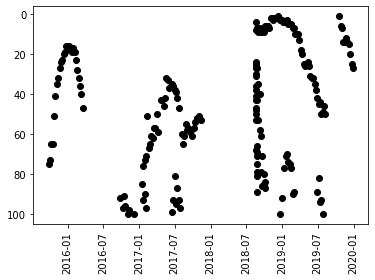

In [11]:
#make a plot
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.plot(trav['WeekID'], trav['Week Position'], 'o', color='black')

Text(0.5, 1.0, 'Travis Scott Song Chart')

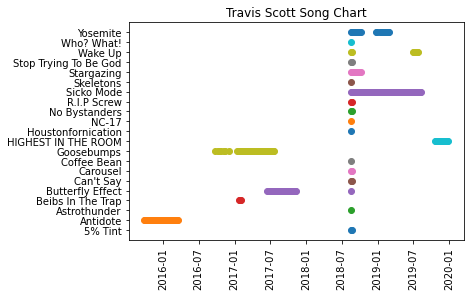

In [12]:
groups = trav.groupby("Song")

for name, group in groups:

    plt.plot(group["WeekID"], group["Song"], marker="o", linestyle="", label=name)
    plt.xticks(rotation=90)

plt.title("Travis Scott Song Chart")
#plt.legend()

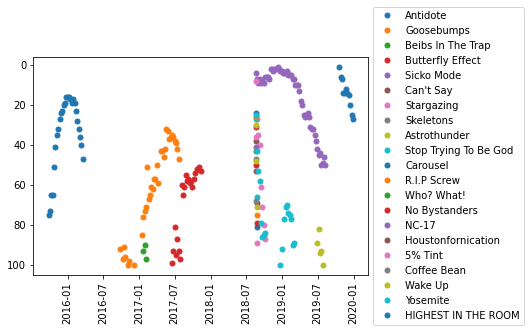

In [13]:
trav = trav.sort_values("WeekID")
groups = trav.groupby("Song",sort = False)

for name, group in groups:

    plt.plot(group["WeekID"], group["Week Position"], marker="o", markersize=5, linestyle="",label=name)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
def artist_history(artist, search_by_string = False):
    """Creates a chart of an artists billboard hits, 
    Showing which songs were on the charts over time"""
    
    #data frame isolated for given artists music, sorted by date
    sns.set()
    sns.set_palette("husl",8)
    if search_by_string:
        artist_stats = df.loc[df['Performer'].str.contains(artist)].sort_values(['WeekID']).reset_index(drop=True)
    else:
        artist_stats = df.loc[df['Performer']==artist].sort_values(['WeekID']).reset_index(drop=True)
    
    groups = artist_stats.groupby(["Song"], sort=False) #Groups Songs into 
    
    fig = plt.figure(figsize = (10,0.25*len(groups))) #figure is longer if artist has more songs
    
    ax = sns.scatterplot(data=artist_stats,x='WeekID',y='Song', hue='SongID', linewidth = 0,legend = False, palette = "muted") #plot
    #ax = plt.axes()
    plt.xticks(rotation=-75) 
    
    #plot for each song
    #for name, group in groups:
    #    ax.plot(group["WeekID"], group["Song"], marker="o", linestyle="", label=name)
    
    
    fig.autofmt_xdate() #date format
    ax.invert_yaxis() #earlier songs at the top
    ax.set(xlabel = 'Week', ylabel='Song', title = artist+' Chart History', xlim=(artist_stats.WeekID.min(),artist_stats.WeekID.max()) ) #chart n stuff


In [15]:
def artist_position(artist,search_by_string = False):
    """Makes a Jackson Polluck Painting"""
    sns.set()
    #dataframe isolated for artist, sorted by date
    if search_by_string:
        artist_songs = df.loc[df['Performer'].str.contains(artist)].sort_values(['WeekID']).reset_index(drop=True)
    else:
        artist_songs = df.loc[df['Performer']==artist].sort_values(['WeekID']).reset_index(drop=True)
    
    groups = artist_songs.groupby(["Song"], sort=False) #each song in the group
    
    #plot
    fig = plt.figure()
    ax = sns.scatterplot(data=artist_songs,x='WeekID',y='Week Position', hue='Song', legend = False)
    plt.xticks(rotation=-75)
    
    #plot each song
    #for name, group in groups:
        #plots position on charts of each song over time
        #ax.plot(group["WeekID"], group["Week Position"], marker="o", linestyle="", label=name)
    
    plt.gca().invert_yaxis()
    ax.set(title = artist +" Song Chart", xlabel = "Week", ylabel = 'Billboard Position', xlim=(artist_songs.WeekID.min(),artist_songs.WeekID.max()))
#plt.legend()

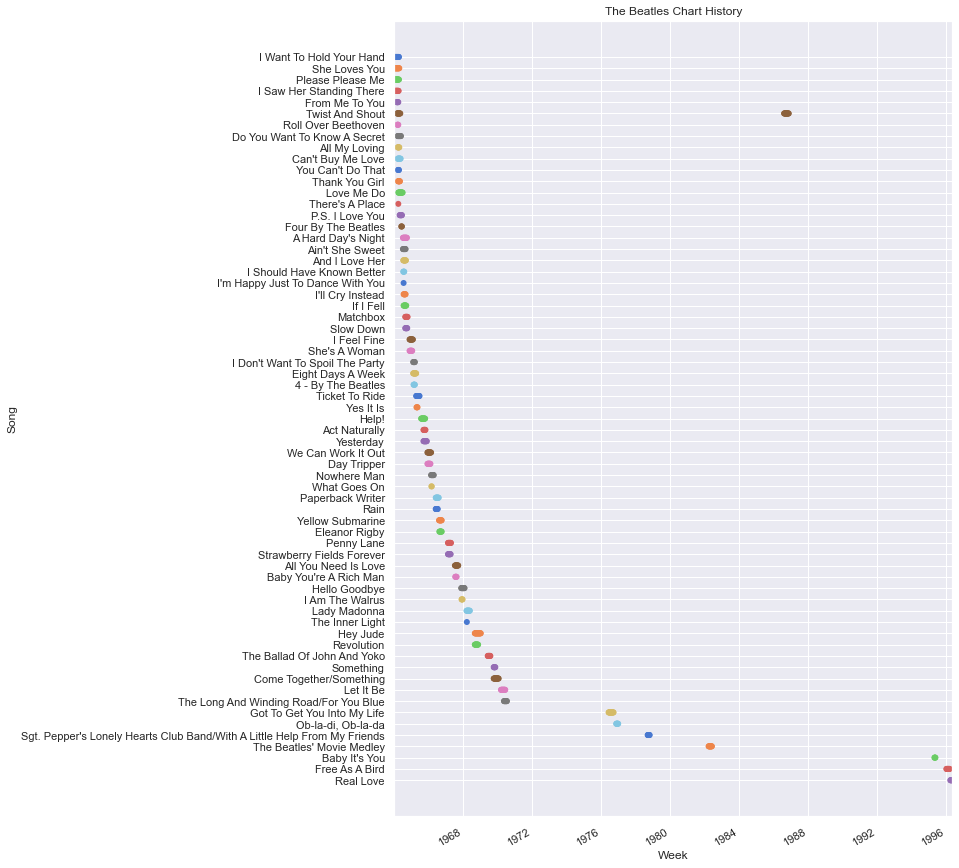

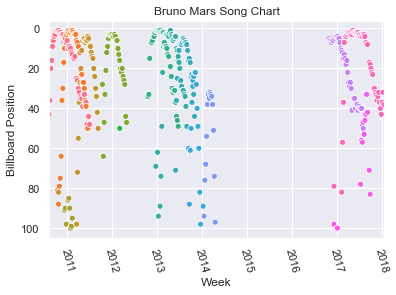

In [16]:
artist_history('The Beatles')
artist_position('Bruno Mars')

In [17]:
#Most Songs On Billboard
unique_songs = df.drop_duplicates(subset = ["SongID"])
unique_songs["Performer"].value_counts().head(20)
#Problem, songs featuring multiple artists not counted, ie. "artist Feat. foo" would not add to "artist" count

Glee Cast                             183
Drake                                  90
Taylor Swift                           84
The Beatles                            65
Aretha Franklin                        64
Elton John                             58
The Rolling Stones                     57
Stevie Wonder                          54
The Beach Boys                         53
Elvis Presley With The Jordanaires     53
Connie Francis                         53
Madonna                                53
Neil Diamond                           52
Elvis Presley                          50
The Temptations                        49
Jackie Wilson                          48
Brenda Lee                             48
Ray Charles                            48
Dionne Warwick                         47
James Brown                            47
Name: Performer, dtype: int64

In [18]:
#Most number 1 hits
top_songs = df[df["Peak Position"]==1]
top_songs = top_songs.drop_duplicates(subset = ["SongID"])
top_songs["Performer"].value_counts().head(10)
#Problem: Songs Featuring multiple Artists not counted ie. "artist Feat. foo" or "artist and bar"

The Beatles           19
Mariah Carey          16
Madonna               12
Michael Jackson       11
Whitney Houston       11
The Supremes          10
Bee Gees               9
The Rolling Stones     8
Stevie Wonder          7
Janet Jackson          7
Name: Performer, dtype: int64

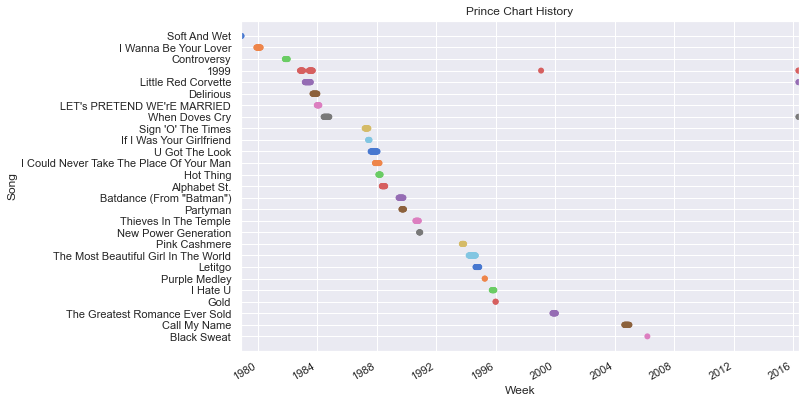

In [23]:
artist_history("Prince")

In [24]:
def top1_by_year(year):
    '''
    returns the top hits of given year
    '''
    top1 = df.loc[df['Week Position']==1].reset_index(drop=True)
    top1 = top1.drop(columns=['url']).sort_values('WeekID').reset_index(drop=True)
    top1['Year'] = pd.DatetimeIndex(top1['WeekID']).year
    top1_year = top1.loc[top1['Year']==year]
    return top1_year

In [25]:
def generic_cascade(songs, chart_title = 'Chart History', width = 10, display_artist=False):
    """Creates cascading chart in the style of ARTIST HISTORY,
        Given a dataframe of songs
    """
    
    #sorts songs by date
    songs = songs.sort_values(['WeekID']).reset_index(drop=True)
    
    groups = songs.groupby(["Song"], sort=False) #Groups by song 

    fig = plt.figure(figsize = (width,0.25*len(groups))) #figure is longer if artist has more songs
    
    ax = plt.axes() #plot dat boy
    
    #So that we can see the artist if our list containes many artists
    if display_artist:
        label = "SongID"
    else:
        label = "Song"
    
    #plot for each song
    for name, group in groups:
        ax.plot(group["WeekID"], group[label], marker="o", linestyle="", label=name)
    fig.autofmt_xdate() #date format
    ax.invert_yaxis() #earlier songs at the top
    ax.set(xlabel = 'Week', ylabel='Song', title = chart_title) #chart n stuff

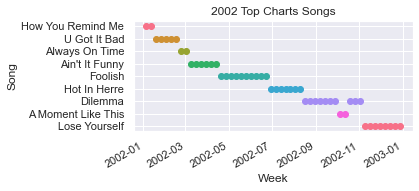

In [26]:
songs_2001 = top1_by_year(2002)
generic_cascade(songs_2001,"2002 Top Charts Songs", width = 5)

In [27]:
def top1_period(start_year, end_year):
    
    top1 = df.loc[df['Week Position']==1].reset_index(drop=True)
    top1 = top1.drop(columns=['url']).sort_values('WeekID').reset_index(drop=True)
    top1['Year'] = pd.DatetimeIndex(top1['WeekID']).year
    
    top1_interval = top1.loc[(top1['Year']>=start_year) & (top1['Year']<(end_year))]

    return top1_interval

In [28]:
top1_by_year(2005).drop_duplicates("Song")

,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
2422,2005-01-01,1,Let Me Love You,Mario,Let Me Love YouMario,1,2.0,1,11,2005
2431,2005-03-05,1,Candy Shop,50 Cent Featuring Olivia,Candy Shop50 Cent Featuring Olivia,1,2.0,1,5,2005
2440,2005-05-07,1,Hollaback Girl,Gwen Stefani,Hollaback GirlGwen Stefani,1,3.0,1,6,2005
2444,2005-06-04,1,We Belong Together,Mariah Carey,We Belong TogetherMariah Carey,1,2.0,1,8,2005
2448,2005-07-02,1,Inside Your Heaven,Carrie Underwood,Inside Your HeavenCarrie Underwood,1,NaN,1,1,2005
2459,2005-09-17,1,Gold Digger,Kanye West Featuring Jamie Foxx,Gold DiggerKanye West Featuring Jamie Foxx,1,19.0,1,8,2005
2469,2005-11-26,1,Run It!,Chris Brown,Run It!Chris Brown,1,2.0,1,14,2005
2474,2005-12-31,1,Don't Forget About Us,Mariah Carey,Don't Forget About UsMariah Carey,1,2.0,1,11,2005


In [29]:
df[df["Performer"]=="Glee Cast"].drop_duplicates("Song").sort_values("WeekID").head(10)

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
37,http://www.billboard.com/charts/hot-100/2009-0...,2009-06-06,4,Don't Stop Believin',Glee Cast,Don't Stop Believin'Glee Cast,1,NaN,4,1
102985,http://www.billboard.com/charts/hot-100/2009-0...,2009-06-06,98,Rehab,Glee Cast,RehabGlee Cast,1,NaN,98,1
3109,http://www.billboard.com/charts/hot-100/2009-0...,2009-09-26,46,Take A Bow,Glee Cast,Take A BowGlee Cast,1,NaN,46,1
9280,http://www.billboard.com/charts/hot-100/2009-1...,2009-10-10,71,Taking Chances,Glee Cast,Taking ChancesGlee Cast,1,NaN,71,1
51508,http://www.billboard.com/charts/hot-100/2009-1...,2009-10-10,85,Somebody To Love,Glee Cast,Somebody To LoveGlee Cast,1,NaN,85,1
13591,http://www.billboard.com/charts/hot-100/2009-1...,2009-10-24,30,It's My Life / Confessions Part II,Glee Cast,It's My Life / Confessions Part IIGlee Cast,1,NaN,30,1
13754,http://www.billboard.com/charts/hot-100/2009-1...,2009-10-24,40,Halo / Walking On Sunshine,Glee Cast,Halo / Walking On SunshineGlee Cast,1,NaN,40,1
14298,http://www.billboard.com/charts/hot-100/2009-1...,2009-10-31,56,Keep Holding On,Glee Cast,Keep Holding OnGlee Cast,1,NaN,56,1
27958,http://www.billboard.com/charts/hot-100/2009-1...,2009-10-31,65,No Air,Glee Cast,No AirGlee Cast,1,NaN,65,1
1076,http://www.billboard.com/charts/hot-100/2009-1...,2009-11-07,34,Sweet Caroline,Glee Cast,Sweet CarolineGlee Cast,1,NaN,34,1


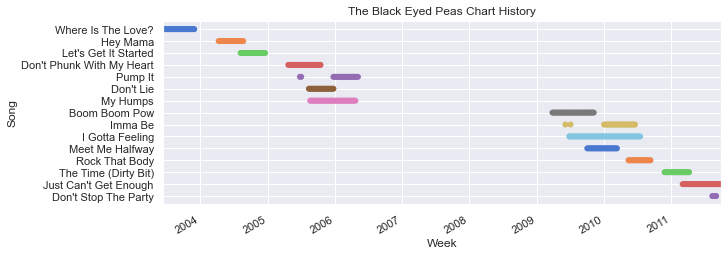

In [30]:
artist_history("The Black Eyed Peas")

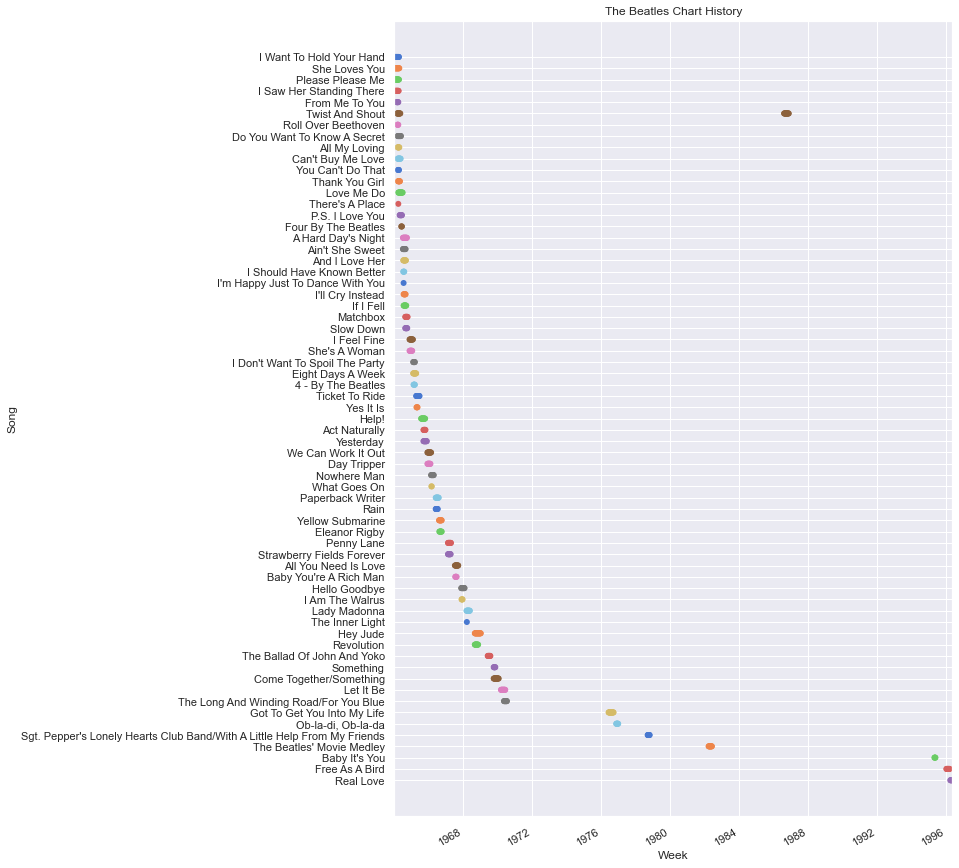

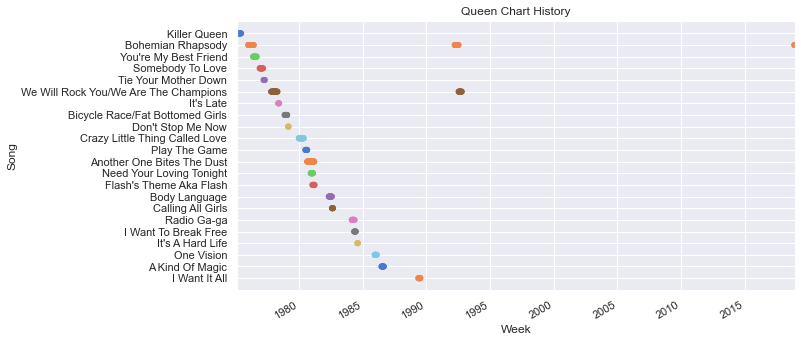

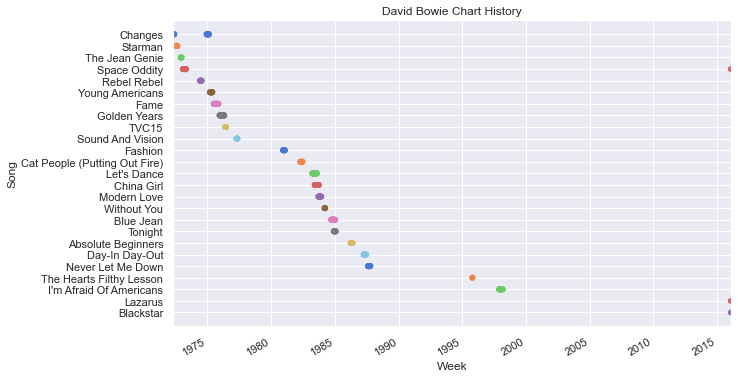

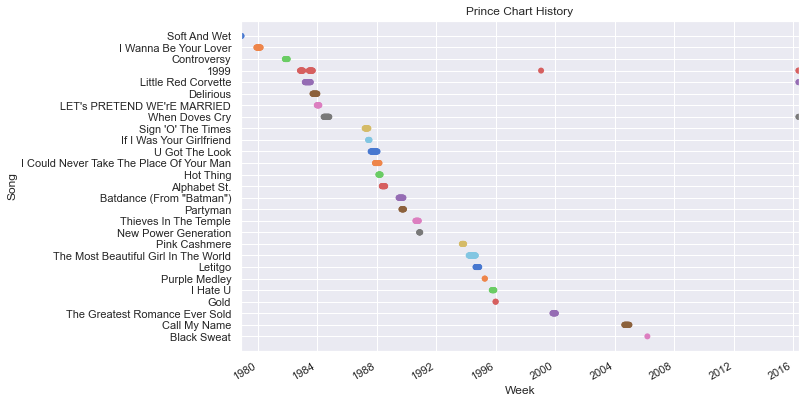

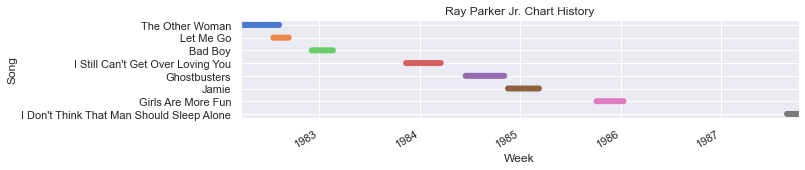

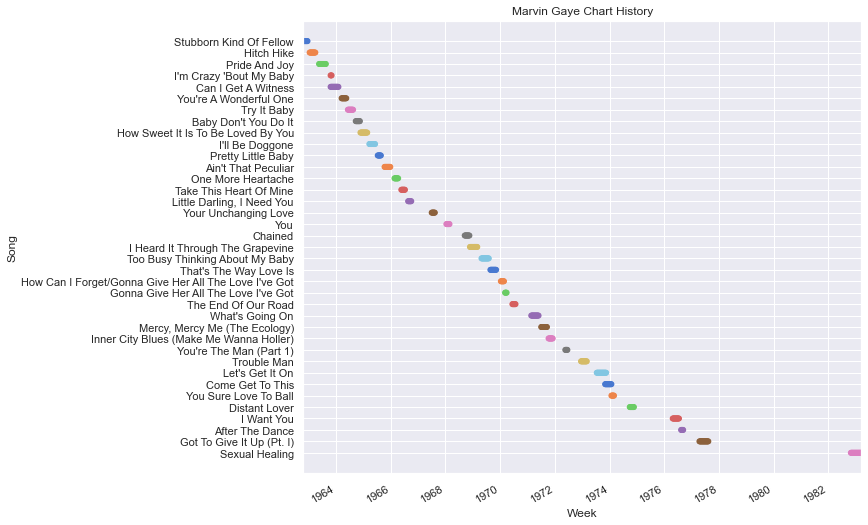

In [31]:
#movie revivals
artist_history("The Beatles")
artist_history("Queen")

#dead revivals
artist_history("David Bowie")
artist_history("Prince")

artist_history("Ray Parker Jr.")

#artists
artist_history("Marvin Gaye")


In [32]:
#Test For Revivals
from datetime import timedelta
timeline = df.sort_values(["WeekID"])
all_songs = timeline.groupby(["SongID"],sort=False)

revival_songs = []
for name, song in all_songs:
    
    #Explanation of this.. So any WeekID that is more than a year from initial week ID will in the dataframe. Then we check if em
    if not song[song["WeekID"] >= song["WeekID"].iloc[0] + timedelta(days = 365*5)].empty :
        revival_songs.append(name)
        print(name)

Run Rudolph RunChuck Berry
Jingle Bell RockBobby Helms
White ChristmasBing Crosby
VenusFrankie Avalon
I Can't Get You Out Of My HeartAl Martino
Tall Cool OneThe Wailers
Harlem NocturneThe Viscounts
Come Rain Or Come ShineRay Charles
Rockin' Around The Christmas TreeBrenda Lee
The Christmas Song (Merry Christmas To You)Nat King Cole
Stand By MeBen E. King
Breaking Up Is Hard To DoNeil Sedaka
Do You Love MeThe Contours
Monster MashBobby "Boris" Pickett And The Crypt-Kickers
Surfin' U.S.A.The Beach Boys
Twist And ShoutThe Beatles
Help The PoorB.B. King
Last KissJ. Frank Wilson and The Cavaliers
Unchained MelodyThe Righteous Brothers
They're Coming To Take Me Away, Ha-Haaa!Napoleon XIV
Ode To Billie JoeBobbie Gentry
Daydream BelieverThe Monkees
Guitar ManElvis Presley
Living In The U.s.a.The Steve Miller Band
25 Or 6 To 4Chicago
LolaThe Kinks
I Just Want To Make Love To YouFoghat
Space OddityDavid Bowie
Bohemian RhapsodyQueen
Solsbury HillPeter Gabriel
We Will Rock You/We Are The Champions

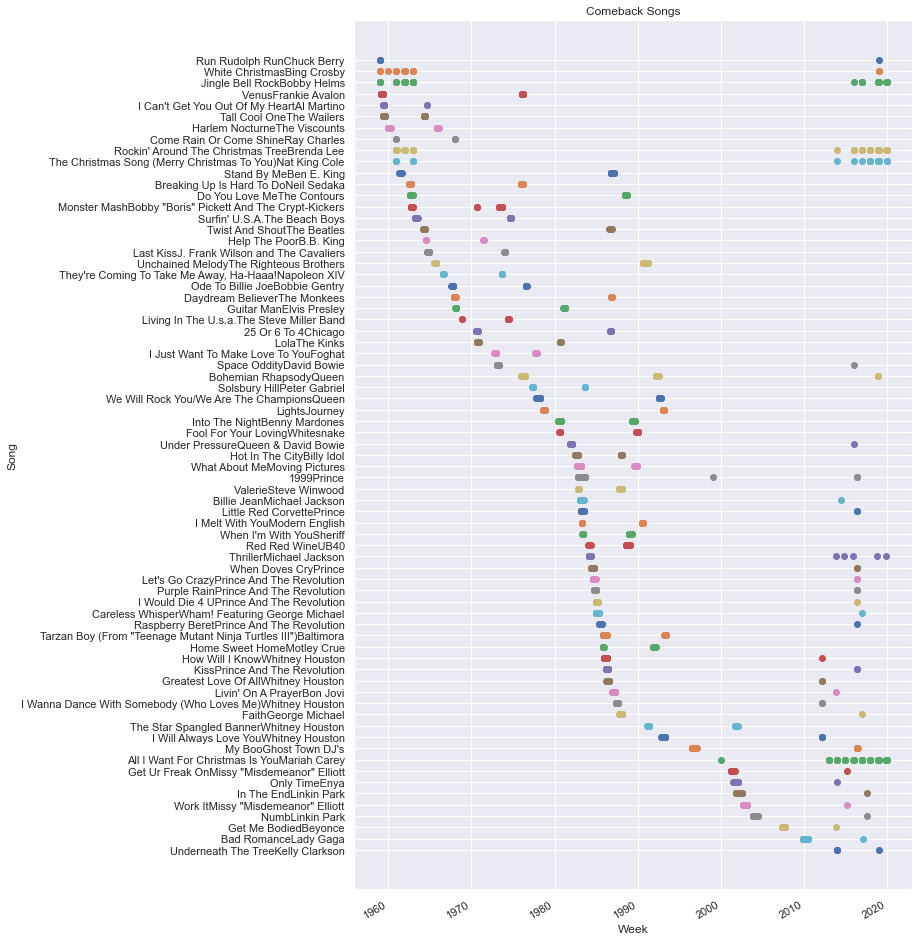

In [33]:
sns.set()
generic_cascade(df[df["SongID"].isin(revival_songs)],chart_title = "Comeback Songs", display_artist = True)

SONGS I'M Curious about ON THIS LIST
Venus = Frankie Avalon
I Can't get you out of my head
come rain or come shine
THE CHRISTMAS SONG
Rockin around the Christmas tree
Stand by me
David Seville and the chipmunks

do u love me the contours --> Revival due to 1987's Dirty Dancing

surfin usa
twist and shout
unchained melody
lights journey
we are the champions
under pressure

1999 prince --> revives in 1999 XD

billie jean 

thriller --> streaming effect

how will IK witney --> 2012 Death led to revival of many of Witney Houstons Greatest Songs

star spangled Banner Witney ---> ORIGINALLY RELEASED DURING THE SUPER BOWL OF 1991 (10 days into gulf war), RERELEASE AFTER 9/11, after which it peaked at #6 on hot charts

livin on a prayer -->2013 when this 2009 vid goes viral https://www.youtube.com/watch?v=mOHkRk00iI8

my boo --> 2016 VIRAL RUNNING MAN CHALLENGE
all i want 4 christmas

bad romance  --> PROBABLY REVIVED DUE TO 2017 HALFTIME PERFORMANCE (WHICH IS KILLER BTW, GO WATCH IT)

25 or 6 to 4 --> Re released in 1986

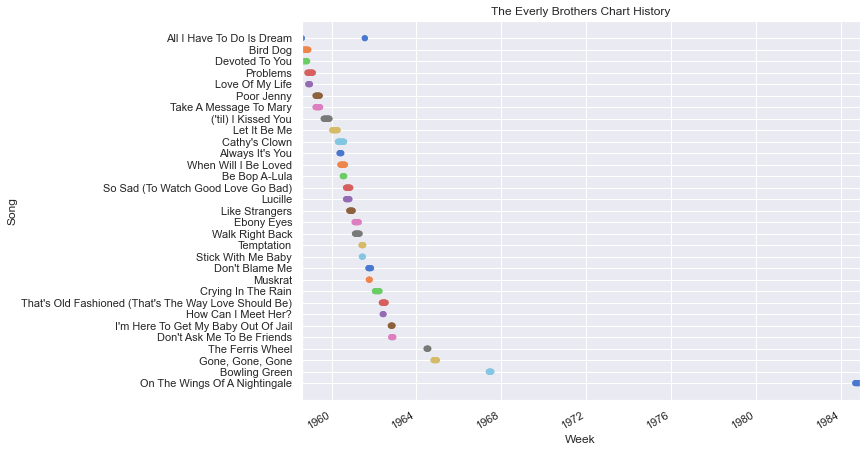

In [34]:
artist_history("The Everly Brothers")

In [35]:
df[df["Song"]=="Finesse"].head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
13659,https://www.billboard.com/charts/hot-100/2018-...,2018-01-13,35,Finesse,Bruno Mars & Cardi B,FinesseBruno Mars & Cardi B,1,NaN,35,1
13802,https://www.billboard.com/charts/hot-100/2018-...,2018-07-14,42,Finesse,Drake,FinesseDrake,1,NaN,42,1
84431,https://www.billboard.com/charts/hot-100/2018-...,2018-01-20,3,Finesse,Bruno Mars & Cardi B,FinesseBruno Mars & Cardi B,1,35.0,3,2
90163,https://www.billboard.com/charts/hot-100/2018-...,2018-07-21,78,Finesse,Drake,FinesseDrake,1,42.0,42,2
114884,https://www.billboard.com/charts/hot-100/2018-...,2018-02-10,3,Finesse,Bruno Mars & Cardi B,FinesseBruno Mars & Cardi B,1,5.0,3,5


In [36]:
df[df["Performer"== "Bruno Mars & Cardi B"]].head()

KeyError: False